In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# dt_clf 생성
dt_clf = DecisionTreeClassifier(random_state=156,max_depth=None)#,min_samples_split=4)
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,
                                                test_size=0.2,random_state=11)

In [2]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,
               feature_names=iris_data.feature_names,impurity=True,filled=True)

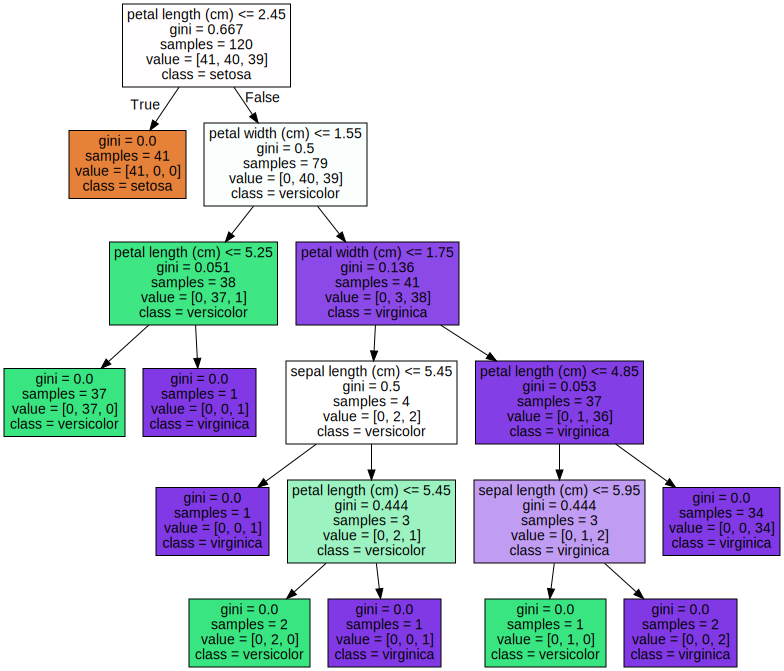

In [5]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### feature_importances_

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [7]:
print('Features:\n',iris_data.feature_names)
print('Feature importances:\n{}'.format(np.round(dt_clf.feature_importances_,3)))
print('Best Feature :{}, Value: {}'.format(iris_data.feature_names[np.argmax(dt_clf.feature_importances_)],np.max(dt_clf.feature_importances_)))

Features:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importances:
[0.025 0.    0.555 0.42 ]
Best Feature :petal length (cm), Value: 0.5549028149313102


sepal length (cm) ; 0.025
sepal width (cm) ; 0.000
petal length (cm) ; 0.555
petal width (cm) ; 0.420


<AxesSubplot:>

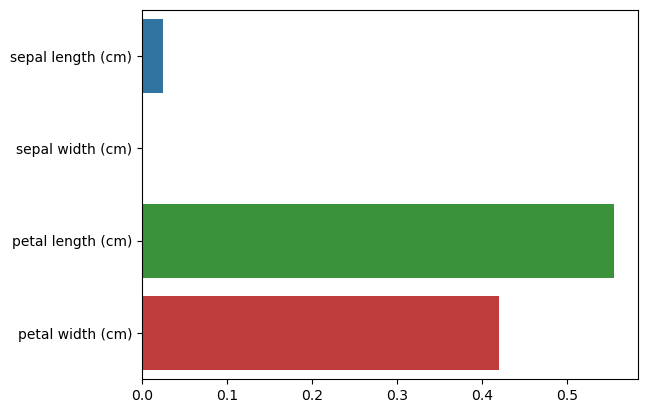

In [8]:
# 시각화
for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{} ; {:.3f}'.format(name,value))
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

# 결정 트리의 과적합

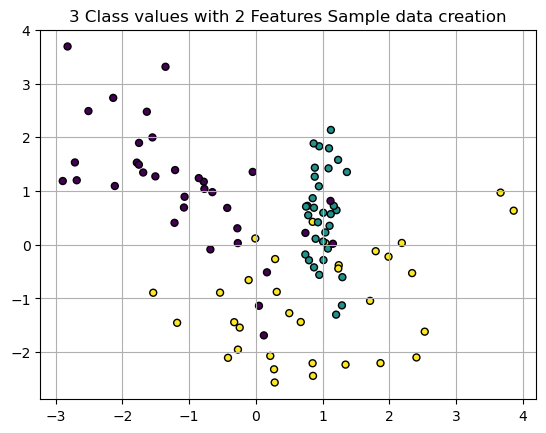

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
plt.title('3 Class values with 2 Features Sample data creation')
# 3개의 class를 가진 레이블을 만든다. 피처는 2개이다.
X_features, y_labels = make_classification(n_features=2, n_redundant=0,n_informative=2,
                                          n_classes=3,n_clusters_per_class=1,random_state=0)
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,edgecolors='k')
plt.grid()
plt.show()

In [10]:
X_features.shape

(100, 2)

In [11]:
y_labels.shape

(100,)

In [12]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

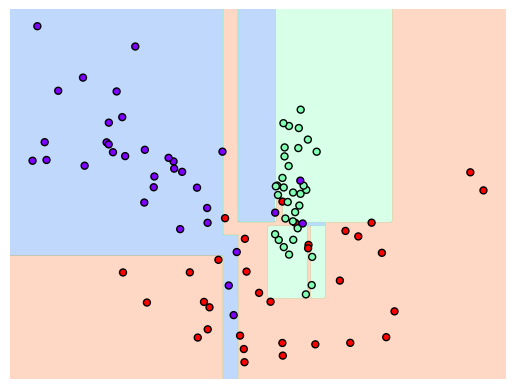

In [13]:
test_dt_clf = DecisionTreeClassifier(random_state=156)
test_dt_clf.fit(X_features,y_labels)
visualize_boundary(test_dt_clf,X_features,y_labels)

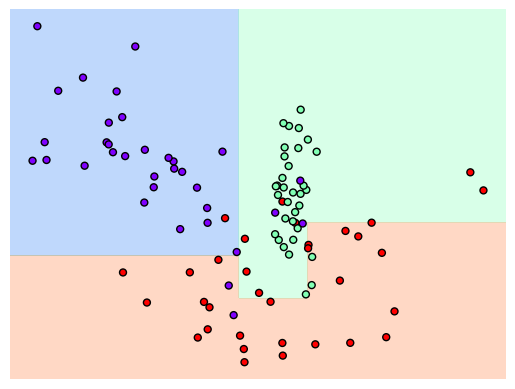

In [16]:
test_dt_clf_msl6 = DecisionTreeClassifier(random_state=156,min_samples_leaf=6)
test_dt_clf_msl6.fit(X_features,y_labels)
visualize_boundary(test_dt_clf_msl6,X_features,y_labels)

In [21]:
export_graphviz(test_dt_clf_msl6,out_file='tree_msl6.dot',class_names=['y1','y2','y3'],
               feature_names=['x1','x2'],impurity=True,filled=True)

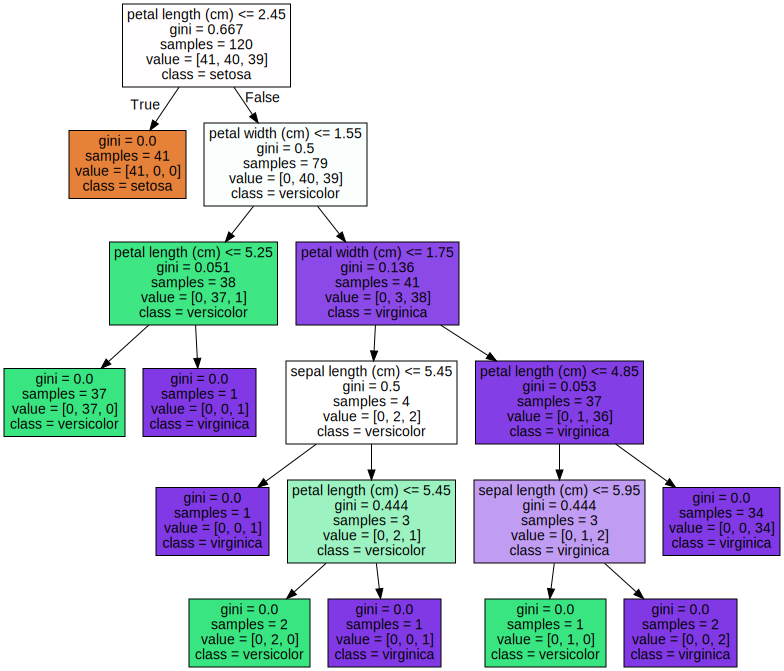

In [22]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## GridSearchCV를 활용해 하이퍼 파라미터 튜닝하기

In [23]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameters = {
    'max_depth': [None, 1, 2, 3, 4, 5],  # 최대 깊이 후보
    'min_samples_split': [2, 3, 4, 5, 6],       # 노드 분할을 위한 최소 샘플 수 후보
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]         # 리프 노드를 위한 최소 샘플 수 후보
}

In [36]:
dt_clf_GSCV = DecisionTreeClassifier()

In [37]:
grid_cv = GridSearchCV(dt_clf_GSCV, param_grid=parameters, scoring='accuracy', cv=5)
grid_cv.fit(X_features, y_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             scoring='accuracy')

In [38]:
grid_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [39]:
print('Best Accuracy:',grid_cv.best_score_)

Best Accuracy: 0.86


In [46]:
grid_cv_f1_macro = GridSearchCV(dt_clf_GSCV,param_grid=parameters,scoring='f1_macro',cv=5).fit(X_features,y_labels)
print('Best params: {}\nBest F1_macro Score:{}'.format(grid_cv_f1_macro.best_params_,grid_cv_f1_macro.best_score_))

Best params: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best F1_macro Score:0.8520346320346321


In [47]:
grid_cv_f1.best_score_

0.8520346320346321